In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [4]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp

import seawater
import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
from scipy import optimize
import arrow
import gsw
import pandas as pd
%matplotlib inline

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [5]:
#load_a_BC_file

In [21]:

#     preind_TA_res = np.zeros([40,10,95])
#     preind_TA_res[:,i,:] = preind_nc_TA[0,:,0,i*95:(i+1)*95]
#     preind_TA_res[preind_TA_res ==0 ] = nan
#     preind_mean_TA = np.nanmean(preind_TA_res,axis = 1)
#     presday_TA_res = np.zeros([40,10,95])
#     presday_TA_res[:,i,:] = presday_nc_TA[0,:,0,i*95:(i+1)*95]
#     presday_TA_res[presday_TA_res ==0 ] = nan
#     presday_mean_TA = np.nanmean(presday_TA_res,axis = 1)

## extra DIC in one day of BC - jan 1 

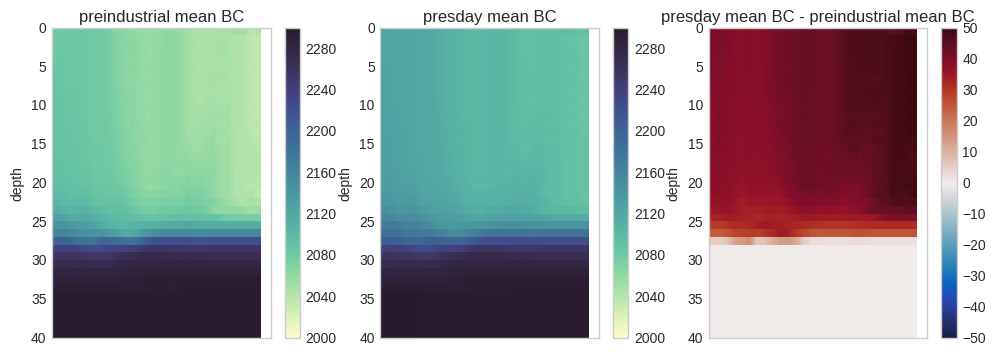

In [22]:
fig = plt.figure(figsize=(12,4))
nop = 3
for i in range(1,nop+1):

    if i == 1:
        ax = fig.add_subplot(1,3,i)
        tcmap = cm.cm.deep
        cmap = tcmap
        tplt = preind_mean_DIC
        mesh = ax.pcolormesh(tplt, cmap = tcmap, vmin=2000, vmax=2300)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('preindustrial mean BC') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])
        
    if i == 2:
        ax = fig.add_subplot(1,3,i)
        tcmap = cm.cm.deep
        cmap = tcmap
        tplt = presday_mean_DIC
        mesh = ax.pcolormesh(tplt, cmap = tcmap, vmin=2000, vmax=2300)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('presday mean BC') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])
        
    if i == 3:
        ax = fig.add_subplot(1,3,i)
        tcmap = cm.cm.balance
        cmap = tcmap
        tplt = presday_mean_DIC - preind_mean_DIC
        mesh = ax.pcolormesh(tplt, cmap = tcmap, vmin=-50, vmax=50)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('presday mean BC - preindustrial mean BC') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])

## extra TA in one day of BC - jan 1 (should be 0!)


/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


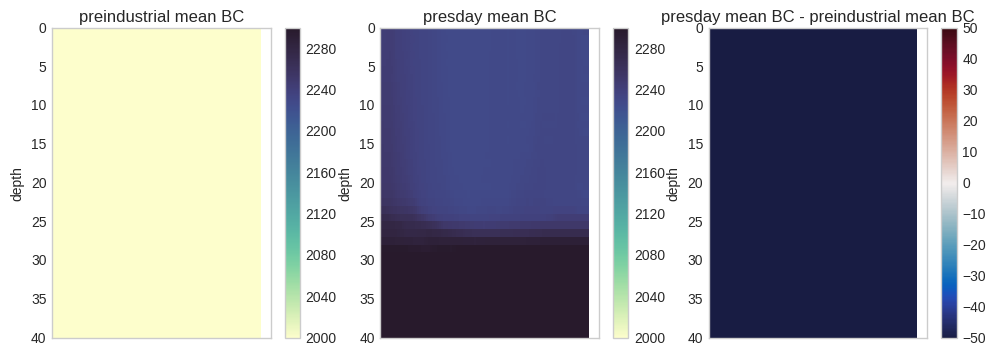

In [8]:
fig = plt.figure(figsize=(12,4))
nop = 3
for i in range(1,nop+1):

    if i == 1:
        ax = fig.add_subplot(1,3,i)
        tcmap = cm.cm.deep
        cmap = tcmap
        tplt = preind_mean_TA
        mesh = ax.pcolormesh(tplt, cmap = tcmap, vmin=2000, vmax=2300)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('preindustrial mean BC') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])
        
    if i == 2:
        ax = fig.add_subplot(1,3,i)
        tcmap = cm.cm.deep
        cmap = tcmap
        tplt = presday_mean_TA
        mesh = ax.pcolormesh(tplt, cmap = tcmap, vmin=2000, vmax=2300)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('presday mean BC') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])
        
    if i == 3:
        ax = fig.add_subplot(1,3,i)
        tcmap = cm.cm.balance
        cmap = tcmap
        tplt = presday_mean_TA - preind_mean_TA
        mesh = ax.pcolormesh(tplt, cmap = tcmap, vmin=-50, vmax=50)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('presday mean BC - preindustrial mean BC') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])

## repeating boundary conditions in 950 * 40 (depth) format

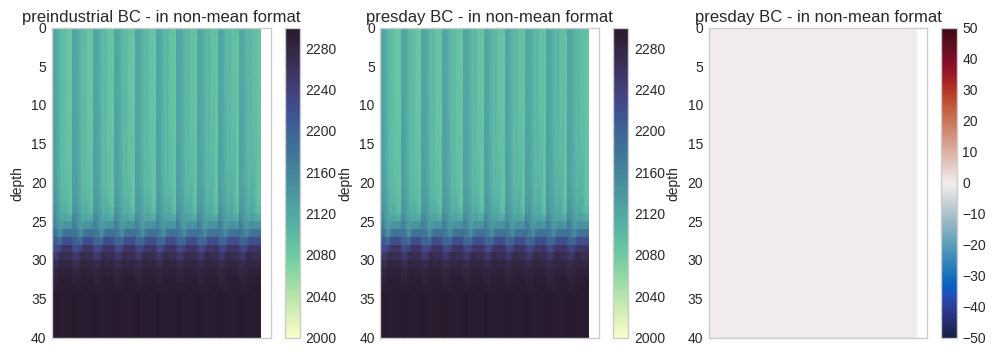

In [9]:
fig = plt.figure(figsize=(12,4))
nop = 3
for i in range(1,nop+1):

    if i == 1:
        ax = fig.add_subplot(1,3,i)
        tcmap = cm.cm.deep
        cmap = tcmap
        tplt = preind_nc_DIC[0,:,0,:]
        mesh = ax.pcolormesh(tplt, cmap = tcmap, vmin=2000, vmax=2300)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('preindustrial BC - in non-mean format') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])
        
    if i == 2:
        ax = fig.add_subplot(1,3,i)
        tcmap = cm.cm.deep
        cmap = tcmap
        tplt = presday_nc_DIC[0,:,0,:]
        mesh = ax.pcolormesh(tplt, cmap = tcmap, vmin=2000, vmax=2300)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('presday BC - in non-mean format') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])
        
    if i == 3:
        ax = fig.add_subplot(1,3,i)
        tcmap = cm.cm.balance
        cmap = tcmap
        tplt = presday_nc_DIC[0,:,0,:] - preind_nc_DIC[0,:,0,:]
        mesh = ax.pcolormesh(tplt, cmap = tcmap, vmin=-50, vmax=50)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('presday BC - in non-mean format') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])

In [10]:
year_ar = []
year = 2015
noday = 365
daymon = [31,28,31,30,31,30,31,31,30,31,30,31]
daymon_LY = [31,29,31,30,31,30,31,31,30,31,30,31]

if year == 2016:
    t_daymon = daymon_LY
    noday = 366
else:
    t_daymon = daymon

for m in range(1,13):
    if m>=10:
        tm = str(m)
    if m<10:
        tm = '0' + str(m)
    for d in range(1,t_daymon[m-1]+1):
        if d>=10:
            td = str(d)
        if d<10:
            td = '0' + str(d)

        tstr = 'y' + str(year) + 'm' + tm + 'd' + td
        year_ar.append(tstr)

In [11]:
year_preind_mean = np.zeros([365,40,95])
year_presday_mean = np.zeros([365,40,95])

In [12]:
for d in range(0,365):
    preind_nc = nc.Dataset('/data/tjarniko/MEOPAR/analysis-tereza/'+
                      'notebooks/carbon_dev/BASE_RUN/CLEAN/'+
                      'preind_DIC/ncs_copied_from_original_LO_with_new_DIC_values/PREIND_BC_v201905_' + year_ar[d] +'.nc')

    presday_nc = nc.Dataset('/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201905_' + year_ar[d] +'.nc')

    preind_nc_DIC = preind_nc['DIC']
    presday_nc_DIC = presday_nc['DIC']
    preind_nc_TA = preind_nc['TA']
    presday_nc_TA = presday_nc['TA']

    for i in range(0,10):
        preind_DIC_res = np.zeros([40,10,95])
        preind_DIC_res[:,i,:] = preind_nc_DIC[0,:,0,i*95:(i+1)*95]
        preind_DIC_res[preind_DIC_res ==0 ] = nan
        preind_mean_DIC = np.nanmean(preind_DIC_res,axis = 1)
        presday_DIC_res = np.zeros([40,10,95])
        presday_DIC_res[:,i,:] = presday_nc_DIC[0,:,0,i*95:(i+1)*95]
        presday_DIC_res[presday_DIC_res ==0 ] = nan
        presday_mean_DIC = np.nanmean(presday_DIC_res,axis = 1)
        
    year_preind_mean[d,:,:] = preind_mean_DIC
    year_presday_mean[d,:,:] = presday_mean_DIC


### average monthly extra DIC present-day vs preindustrial

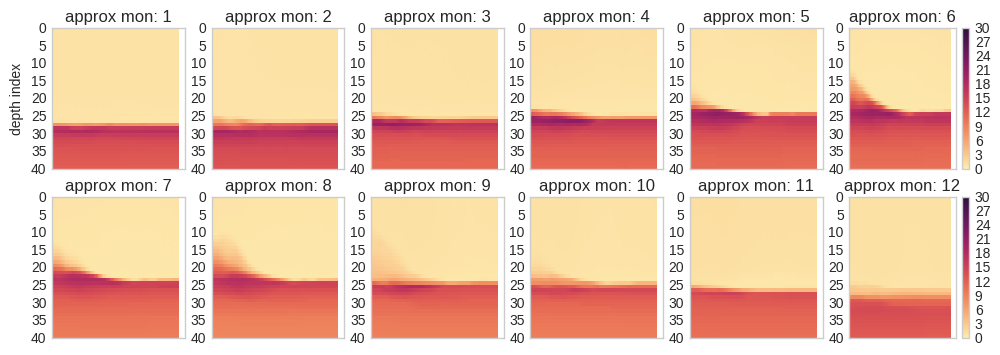

In [13]:
fig = plt.figure(figsize=(12,4))
nop = 12
for i in range(1,nop+1):

    ax = fig.add_subplot(2,6,i)
    tcmap = cm.cm.matter
    cmap = tcmap
    preind_monmean = np.nanmean(year_preind_mean[(i-1)*30:(i)*30,:,:], axis = 0)
    presday_monmean = np.nanmean(year_presday_mean[(i-1)*30:(i)*30,:,:], axis = 0)
    mesh = ax.pcolormesh(presday_monmean - preind_monmean, cmap = tcmap, vmin=0, vmax=30)
    if i ==6:
        cbar = fig.colorbar(mesh, ax=ax)
    if i ==12:
        cbar = fig.colorbar(mesh, ax=ax)
    if i ==1:
        ax.set_ylabel('depth index')
    ax.invert_yaxis()
    land_colour = 'slategrey'
    cmap.set_bad(land_colour)
    plt.title('approx mon: ' + str(i)) 

    ax.set_xticklabels([])
#
#plt.tight_layout()       



In [14]:
ttera_is = gsw.t_from_CT(10,30,10)
print(ttera_is)

28.94881120213446
